<a href="https://colab.research.google.com/github/aaolcay/LMS-Adaptive-Filter/blob/main/Spectral_Leakage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Introduction**

In signal processing, the Fourier Transform is a mathematical technique used to transform a time-domain signal into its corresponding frequency-domain representation. One of the most common methods for computing the Fourier Transform is the Discrete Fourier Transform (DFT), which is used to convert a finite sequence of equally spaced samples of a signal into its equivalent frequency domain representation.

However, the DFT has some limitations, one of which is called spectral leakage. Spectral leakage occurs when the frequency of a signal does not align exactly with any of the DFT frequency bins. This causes some of the energy of the signal to leak into adjacent frequency bins, resulting in a distortion of the frequency spectrum of the signal. In this tutorial, we will explain how spectral leakage occurs and provide an example of how to detect it using Python.


####**Spectral Leakage and Windowing**

To understand spectral leakage, let's first discuss how the DFT works. The DFT is based on the assumption that the input signal is periodic. In other words, the signal repeats itself indefinitely. However, in practice, most signals are not truly periodic, and there can be discontinuities or sharp edges in the signal. These discontinuities can cause spectral leakage.

To illustrate this concept, let's generate a 25 Hz sine wave sampled at 100 Hz and plot it in the time domain:

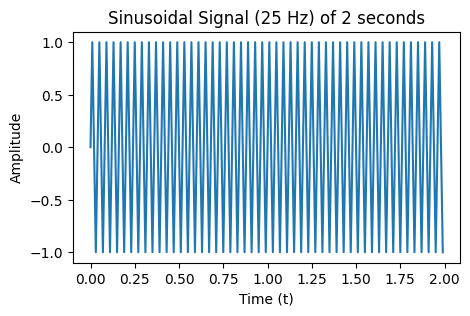

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 25 Hz sine wave sampled at 100 Hz
f = 25
fs = 100
N = 200
t = np.arange(0, N/fs, 1/fs)
x = np.sin(2*np.pi*f*t)
plt.figure(figsize=(5,3))
plt.plot(t, x)
plt.title('Sinusoidal Signal (25 Hz) of 2 seconds')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.show()

The resulting plot shows a sine wave with no sharp edges or discontinuities.

Now, let's compute the DFT of this signal and plot its magnitude spectrum:

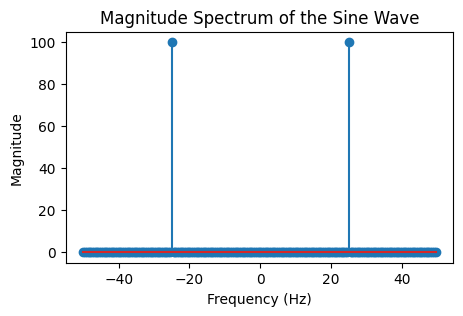

In [2]:
# Compute the DFT of the signal
X = np.fft.fft(x)

# Plot the magnitude spectrum of the DFT
freq = np.fft.fftfreq(len(x), 1/fs)
mag = np.abs(X)
plt.figure(figsize=(5,3))
plt.stem(freq, mag)
plt.title('Magnitude Spectrum of the Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

The resulting plot shows a peak at 25 Hz, which is the fundamental frequency of the signal.

However, let's now introduce a sharp edge into the signal by changing the signal length from 200 samples to 205 samples:

There is spectral leakage :(, please use tapered shape window


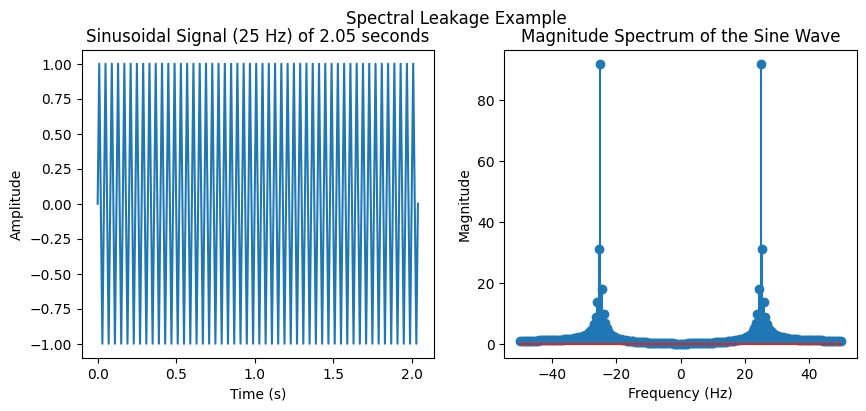

In [3]:
# Generate a 25 Hz sine wave sampled at 100 Hz
f = 25
fs = 100
N = 205 # Non-integer multiple of the period of the sine wave

resolution = fs/N
if f % resolution == 0:
    print("There is no spectral leakage :)")
else:
     print("There is spectral leakage :(, please use tapered shape window")

t = np.arange(0, N/fs, 1/fs)
x = np.sin(2*np.pi*f*t)

# Compute the DFT of the signal
X = np.fft.fft(x)

# Plot the signal and its DFT magnitude spectrum side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Spectral Leakage Example')

# Plot the original signal
axs[0].plot(t, x)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Sinusoidal Signal (25 Hz) of 2.05 seconds')

# Plot the magnitude spectrum of the DFT
freq = np.fft.fftfreq(len(x), 1/fs)
mag = np.abs(X)
axs[1].stem(freq, mag)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Magnitude Spectrum of the Sine Wave')

plt.show()

In this case, we get the following output:



```
There is spectral leakage :(, please use tapered shape window
```

The magnitude spectrum plot shows that the peak has spread over multiple bins, indicating that there is spectral leakage.

To reduce spectral leakage, we can use a tapered window function that gradually decreases the amplitude of the signal towards the edges. This can help to reduce the sharp discontinuities and spread the energy of the signal more evenly across the frequency bins.

In summary, spectral leakage occurs when a signal with a non-integer number of cycles within the chosen signal length is analyzed using the DFT. This can cause energy to leak into adjacent frequency bins, resulting in a distorted frequency spectrum. The use of a tapered window function can help to reduce spectral leakage and improve the accuracy of frequency analysis using the DFT.



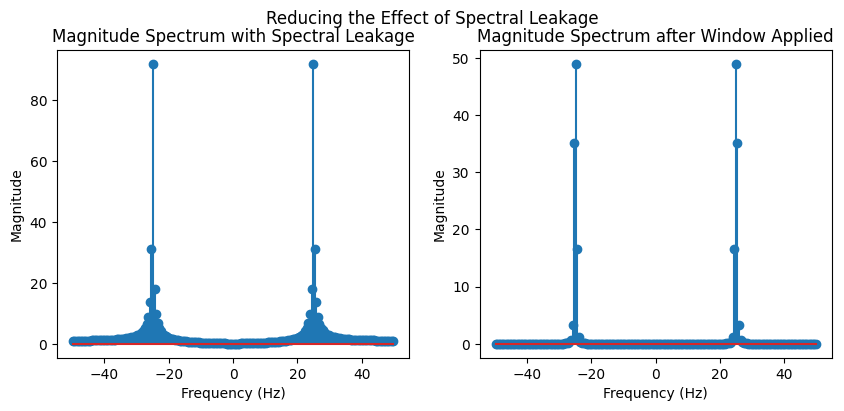

In [4]:
# Plot the signal and its DFT magnitude spectrum side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Reducing the Effect of Spectral Leakage')
axs[0].stem(freq, mag)
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('Magnitude Spectrum with Spectral Leakage')

# Apply Hanning window to the sine wave and DFT to Windowed Signal
X_solving = np.fft.fft(x*np.hanning(len(x)))
mag_solving = np.abs(X_solving)

# Plot the magnitude spectrum of the DFT
axs[1].stem(freq, mag_solving)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Magnitude Spectrum after Window Applied')

plt.show()

To demonstrate the effect of windowing on the spectral leakage, a Hanning window is applied to the sine wave using `np.hanning()`, and the DFT of the windowed signal is computed using `np.fft.fft()`. The magnitude of the DFT is then computed using `np.abs()`, and this is plotted on the right-hand side of the figure.

The resulting figure shows the magnitude spectrum with spectral leakage on the left, and the magnitude spectrum after a Hanning window is applied on the right. The Hanning window reduces the spectral leakage by tapering the edges of the signal and reducing the sharp discontinuities that cause the leakage.